# Análise exploratória de dados

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#9467bd", "#057476", "#FF7A00"]
sns.set_theme(style= "dark")
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette(colors))

## 1. Coleta de Dados

In [94]:
df = sns.load_dataset('diamonds');
df.to_csv('../data/raw/data.csv', index = False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2. Descrição dos Dados

<img src=https://storage.googleapis.com/kaggle-datasets-images/1312/2368/23808724f313005d570be372003594fa/dataset-card.jpg width =800 height =800>

<h4><b>Diamonds</b> é um dataset que apresenta informações de atributos de mais de 54 mil diamantes, sendo elas características importantes na hora da compra ou da venda de diamantes importados. Preço, tamanho e quilates são informações cruciais para o mercado de diamante, por isso faremos um estudo desses dados para que possamos encontrar informações relevantes aos nossos clientes que desejam comprar o melhor diamante nesse luxuoso mercado que movimenta milhões de reais por ano.</h4>

<h4> Explicar algo do modelo preditivo</h4>



<h1>Inclusão da coluna valor, que corresponde a distribuição de Reais por grama, ou seja, quanto vale a grama do diamante</h1>

In [95]:
df['Valor'] = (df['price']/df['carat']).round(2)
df['Valor'].sort_values()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Valor
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.39
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.38
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.74
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.72
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.65


## 2.1 Dicionario:

In [96]:
df_dict = pd.DataFrame([
    {
    "variavel": "carat",
    "descricao":"Peso do diamante(g) -- Quilates",
    "tipo": "quantitativo",
    "subtipo": "continua",
    },{
    "variavel": "cut",
    "descricao": "Tipo/Qualidade do corte realizado no diamante (Ordenado do pior pro melhor)",
    "tipo": "qualitativo",
    "subtipo": "ordinal",
    },{
    "variavel": "color",
    "descricao": "Cor do Diamante (Ordenado do melhor pro pior)",
    "tipo": "qualitativo",
    "subtipo": "ordinal",
    },{
    "variavel": "clarity",
    "descricao": "Pureza do diamante (Ordenado do pior para o melhor)",
    "tipo": "qualitativo",
    "subtipo": "ordinal",
    },{
    "variavel": "depth",
    "descricao": "Largura do topo do diamante em relação ao ponto mais largo",
    "tipo": "quantitativo",
    "subtipo": "continua",
    },{
    "variavel": "table",
    "descricao": "Percentual de profundidade do diamante",
    "tipo": "quantitativo",
    "subtipo": "qualitativo",
    },{
    "variavel": "price",
    "descricao": "Preço do diamante em Dolar ($)",
    "tipo": "quantitativo",
    "subtipo": "discreta",
    },{
    "variavel": "x",
    "descricao": "Uma dimensão do diamante",
    "tipo": "quantitativo",
    "subtipo": "continua",
    },{
    "variavel": "y",
    "descricao": "Uma dimensão do diamante",
    "tipo": "quantitativo",
    "subtipo": "continua",
    },{
    "variavel": "z",
    "descricao": "Uma dimensão do diamante",
    "tipo": "quantitativo",
    "subtipo": "continua",
    },{
    "variavel": "Valor",
    "descricao": "Quanto vale o diamante por grama, maneira de verificar o quão raro ele é",
    "tipo": "quantitativo",
    "subtipo": "discreta",
    }
])

In [97]:
df_dict.to_csv('../data/external/dicionario.csv')
df_dict

,variavel,descricao,tipo,subtipo
0,carat,Peso do diamante(g) -- Quilates,quantitativo,continua
1,cut,Tipo/Qualidade do corte realizado no diamante ...,qualitativo,ordinal
2,color,Cor do Diamante (Ordenado do melhor pro pior),qualitativo,ordinal
3,clarity,Pureza do diamante (Ordenado do pior para o me...,qualitativo,ordinal
4,depth,Largura do topo do diamante em relação ao pont...,quantitativo,continua
5,table,Percentual de profundidade do diamante,quantitativo,qualitativo
6,price,Preço do diamante em Dolar ($),quantitativo,discreta
7,x,Uma dimensão do diamante,quantitativo,continua
8,y,Uma dimensão do diamante,quantitativo,continua
9,z,Uma dimensão do diamante,quantitativo,continua


In [98]:
quantitativo = df_dict[df_dict['tipo'] == 'quantitativo'].variavel.tolist()
qualitativo = df_dict[df_dict['tipo'] == 'qualitativo'].variavel.tolist()
print(quantitativo, qualitativo)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'Valor'] ['cut', 'color', 'clarity']


- Temos no total 10 variáveis, sendo 3 qualitativas e 7 quantitativas, dessas 3 são relacionadas a classificação e 4 são continuas e, coincidentemente, caraacterísticas físicas do diamante

<hr>

<h2>Analise inicial:</h2>
<h4>Aqui buscaremos as informações iniciais dos nossos dados, como: </h4> 
<ul>
 <li>Características das colunas e das linhas.</li>
 <li>Valores como média, frequência, mínimos e máximos</li>
 <li>Valores de exemplo</li>
</ul>

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
 10  Valor    53940 non-null  float64 
dtypes: category(3), float64(7), int64(1)
memory usage: 3.4 MB


In [100]:
df.describe(include = "all")

,carat,cut,color,clarity,depth,table,price,x,y,z,Valor
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,4008.394824
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,2012.665736
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1051.160000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2477.945000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3495.195000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4949.597500


In [101]:
print( f'Nossa tabela possui: {df.shape}')

Nossa tabela possui: (53940, 11)


<hr>

<h2>3. Estudo:</h2>
    <h3>Aqui podemos ter uma base do que teremos como objetivo no projeto, como em qualquer mercado queremos maximizar o preço de nosso produto, então as perguntas serão focadas na relação com a coluna preço e também faremos uma análise do quanto o peso do diamante importa, já que o diamante com maior quilate possui piores qualidades, vamos analisar outros diamantes com peso próximo. Perguntas:</h3>



<h2> 3.1 Dados faltantes: Observe que não há dados faltantes</h2>

In [102]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
Valor      0
dtype: int64

<h2>3.2 Dados que devem ser excluidos:</h2>
<h4> Dados com fatores de duas ou uma dimensão, ou seja com x | y | z =0</h4>

## Observação: Objetos 2D 
Foi observado um possivel conjunto de objetos 2D e 1D, assim atrapalhando nossa analise, para corrigir iremos tira-los da analise

In [103]:
df[ (df['x']== 0) | (df['y'] ==0) | (df['z']==0) ].count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
Valor      20
dtype: int64

In [104]:
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

In [105]:
df[ (df['x']== 0) | (df['y'] ==0) | (df['z']==0) ].count()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
Valor      0
dtype: int64

<h2> 3.3 Distribuição de Dados</h2>

<h4>Veremos novamente nossas análises estatísticas com os dados excluídos</h4>

In [106]:
df.describe(include = 'all')

,carat,cut,color,clarity,depth,table,price,x,y,z,Valor
count,53920.000000,53920,53920,53920,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21548,11284,13063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797698,NaN,NaN,NaN,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,4007.833712
std,0.473795,NaN,NaN,NaN,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,2012.176009
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,1051.160000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2477.667500
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3494.630000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,4949.020000


<ul>
    <li>O corte do tipo ideal, o melhor tipo de corte, é o mais frequente</li>
    <li>A cor G,a média é a mais frequente</li>
</ul>

## Analise estatística

In [107]:
mediana_1 = df['carat'].median()
media_1 = df['carat'].mean().round(4)
q3_1 = df['carat'].quantile(q=0.75)
q4_1 = df['carat'].quantile(q=0.90)
desvio_padrao = df['carat'].std().round(4)

print(f'Temos como informação de Quilates: \n Mediana: {mediana_1} \n Media: {media_1}') 
print(f'75% dos nossos valores tem menos de {q3_1} quilates e 90% possuem {q4_1} quilates')
print(f'Desvio padrão dos quilates: {desvio_padrao}')

Temos como informação de Quilates: 
 Mediana: 0.7 
 Media: 0.7977
75% dos nossos valores tem menos de 1.04 quilates e 90% possuem 1.51 quilates
Desvio padrão dos quilates: 0.4738


In [108]:
Prec_mean = df['price'].mean();
Preco_median = df['price'].median()
q3 = df['price'].quantile(q=0.75).round(2).round(2)
q4 = df['price'].quantile(q=0.90)
print(f"Na nossa tabela de dados temos como preço médio:{Prec_mean:.2f} \n 75%  dos nossos valores tem até {q3} $ e 90 % até {q4} $")

Na nossa tabela de dados temos como preço médio:3930.99 
 75%  dos nossos valores tem até 5323.25 $ e 90 % até 9818.099999999999 $


<hr>

<h4> Logo podemos perceber que diamantes com mais de 1.50 quilates são raros</h4>
<h4> Também que o preço de 10.000 $ é uma espécie de limite </h4>

## Analise Grafica

In [109]:
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

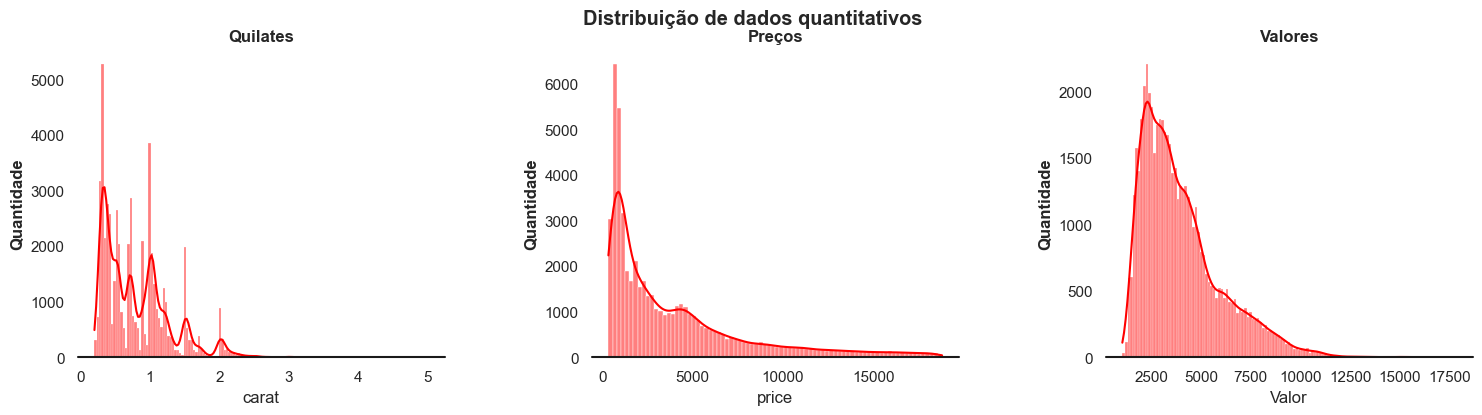

In [123]:
figure, axs = plt.subplots(1,3, figsize = (18,4))
plt.subplots_adjust(wspace = 0.4,hspace = 0.4)
plt.suptitle("Distribuição de dados quantitativos",fontweight= 'bold')

sns.histplot(data = df, x = df['carat'], ax = axs[0],kde = True, color = 'red')
axs[0].grid(axis='y', linestyle='-')
axs[0].set_title('Quilates',fontweight= 'bold')
sns.histplot(data = df, x = df['price'], ax = axs[1],kde = True, color = 'red')
axs[1].set_title('Preços',fontweight= 'bold')
sns.histplot(data = df, x = df['Valor'], ax = axs[2],kde = True, color = 'red')
axs[2].set_title('Valores',fontweight= 'bold')

for ax in axs:
    ax.set(frame_on = False),
    ax.axhline(0,color='k',clip_on= False),
    ax.set_ylabel("Quantidade", fontweight = 'bold')
    ax.grid(axis='y', linestyle='-')

plt.show()

Concluímos:
<ul>
    <li> Valor possui significado bem diferente de preço</li>
    <li> A moda de preço está entre mil e dois mil reais</li>
    <li>Existem alguns quilates com maior quantidade que outros</li>
</ul>

<hr>

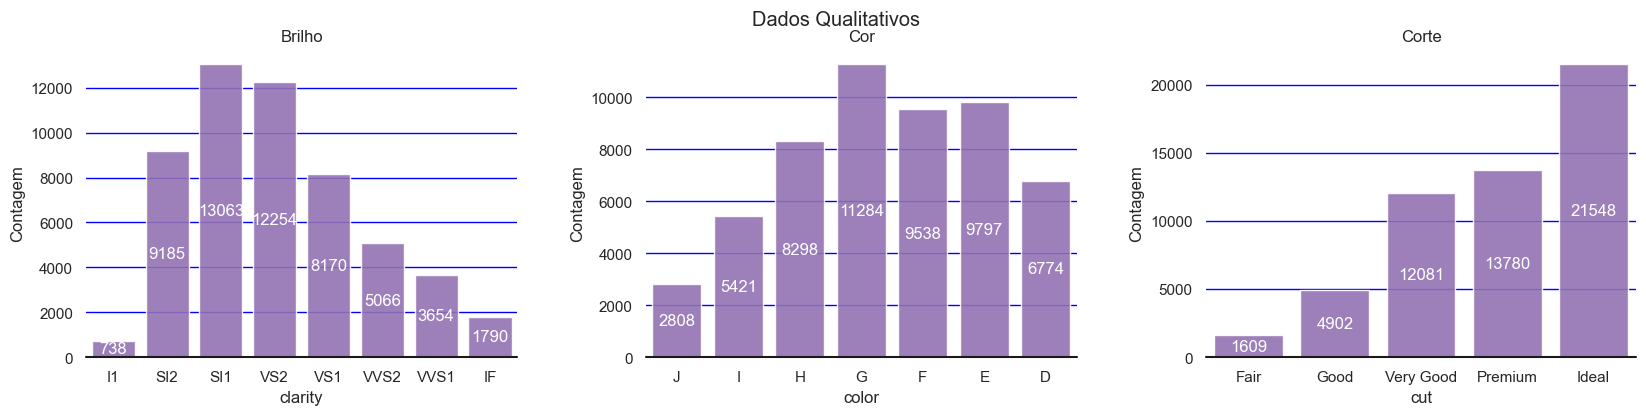

In [136]:
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.suptitle('Dados Qualitativos')


sns.countplot(data = df, x = df['clarity'], order = clarity_order, ax = axs[0], color = colors[0], alpha = 0.9)
axs[0].set_title('Brilho')
axs[0].set_ylabel('Contagem')
sns.countplot(data = df, x  = df['color'], order = color_order, ax  = axs[1], color = colors[0], alpha = 0.9)
axs[1].set_title("Cor")
axs[1].set_ylabel('Contagem')
sns.countplot(data = df, x = df['cut'], order = cut_order, ax = axs[2], color = colors[0], alpha = 0.9)
axs[2].set_title('Corte')
axs[2].set_ylabel('Contagem')
for ax in axs:
        ax.bar_label(
            ax.containers[0],
            label_type = 'center',
            color = 'white'),
        ax.axhline(0,color='k',clip_on=False),
        ax.set(frame_on = False),
        ax.grid(axis='y', linestyle='-', color  = 'blue')
plt.show()

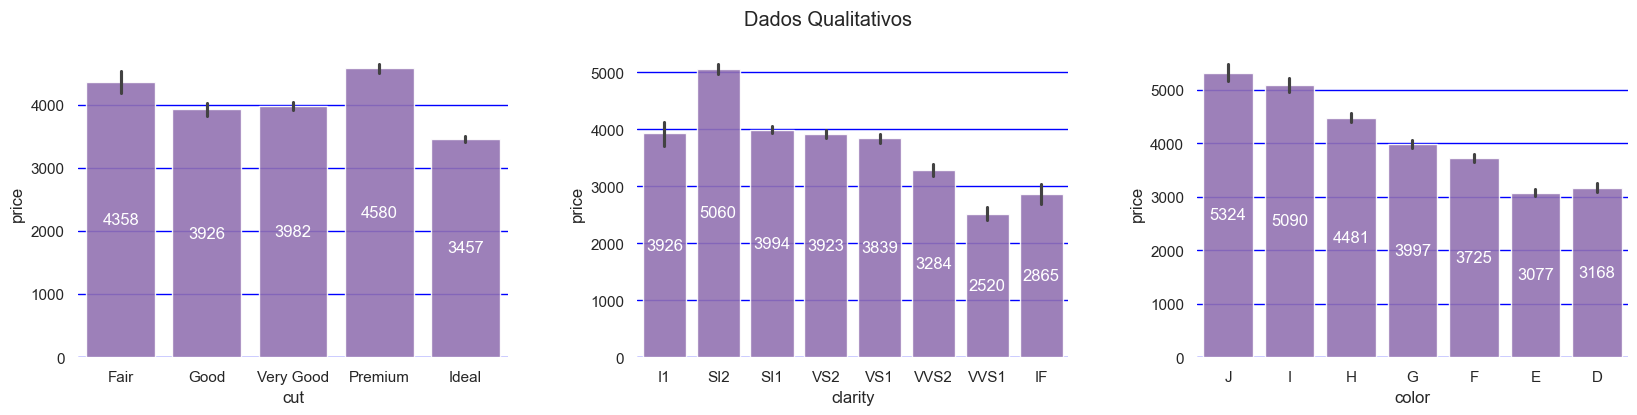

In [137]:
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.suptitle('Dados Qualitativos')



sns.barplot(data  = df, x = df['cut'], y = df['price'], order = cut_order, ax = axs[0], color = colors[0], alpha=0.9)

sns.barplot(data = df, x = df['clarity'], y = df['price'], order = clarity_order, ax = axs[1], color = colors[0], alpha=0.9)

sns.barplot(data = df, x = df['color'], y =df['price'],order = color_order, ax  = axs[2], color = colors[0], alpha=0.9)

for ax in axs:
    ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', fmt = '%.0f')
    ax.set(frame_on = False)
    ax.grid(axis='y',linestyle='-', color='blue')
plt.show()

<Axes: ylabel='price'>

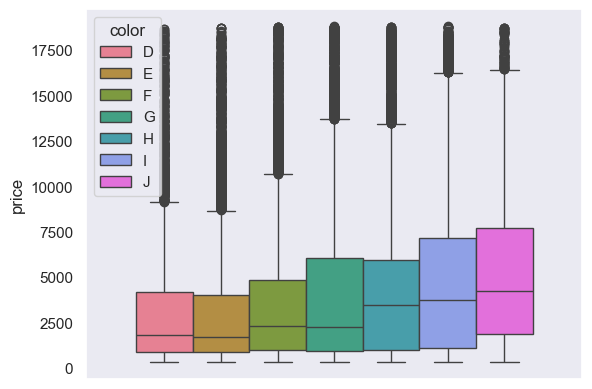

In [19]:
sns.boxplot(data = df, y = 'price', hue = 'color')

<Axes: ylabel='price'>

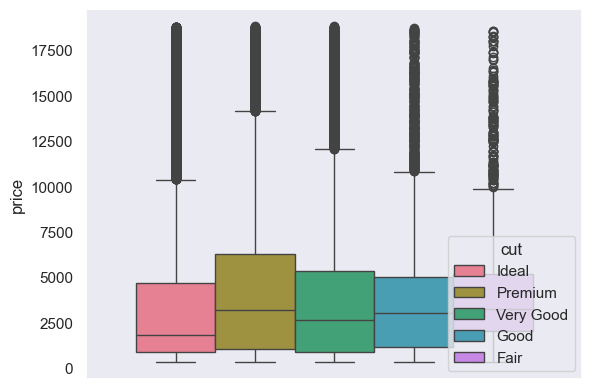

In [20]:
sns.boxplot(data = df, y='price', hue = 'cut')


<Axes: ylabel='price'>

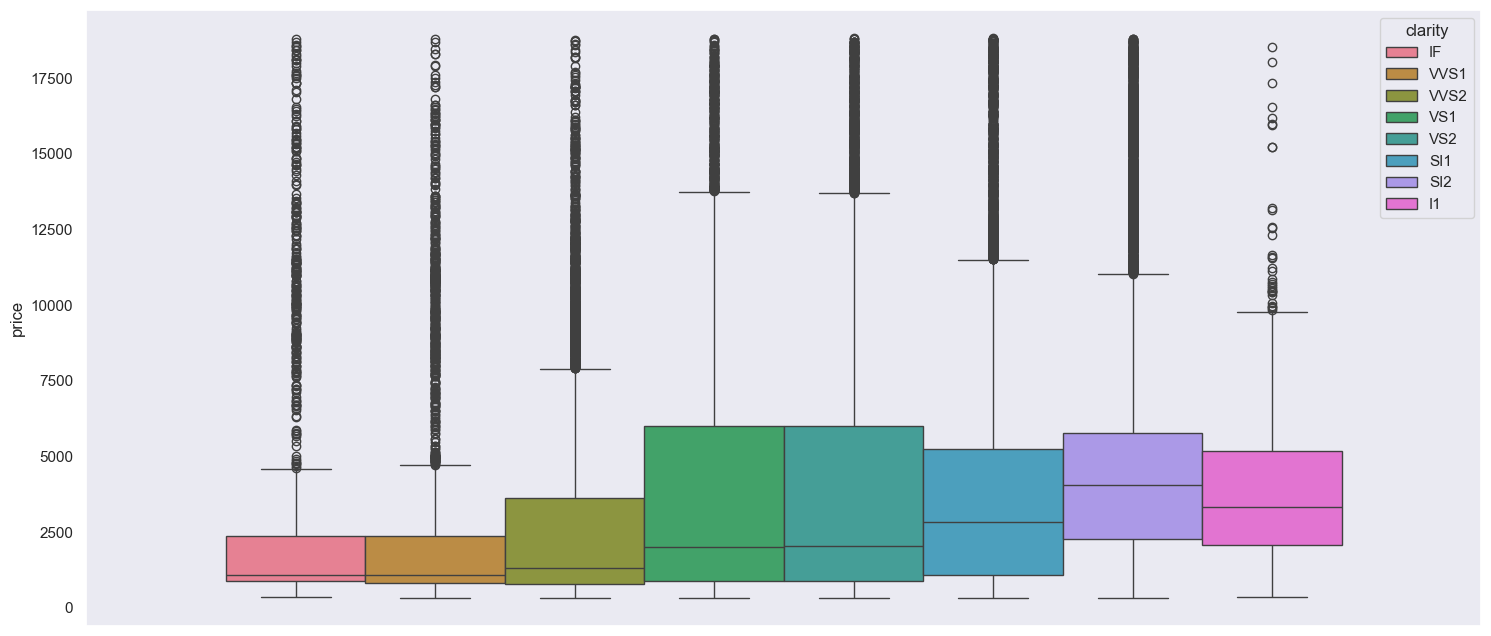

In [21]:
fig = plt.subplots(figsize = (18,8))
sns.boxplot(data = df, y = 'price', hue = 'clarity')

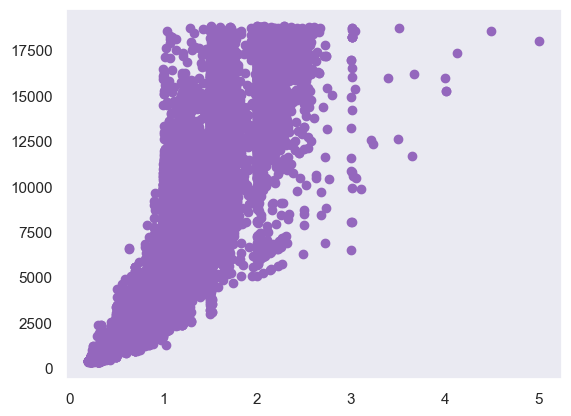

In [24]:
plt.scatter(df['carat'], df['price'])

<h2> Perguntas de partida e hipoteses</h2>
<ol>
    <li>Caracteristicas como cor e brilho não importa tanto no valor final do diamante, percebemos que os diamantes com piores qualidades possuem o maior preço</li>
    <li>É possivel observar que os diamantes mais pesados possuem quaalidades menores, isso mostra porque diamantes com menores qualidades são mais caros, pois <b>O principal fator no preço do diamante é o seu quilate</b></li>
    <li>A quantidade de diamantes com altos quilates são pouquissimas, sendo considerado outliers</li>    
</ol>

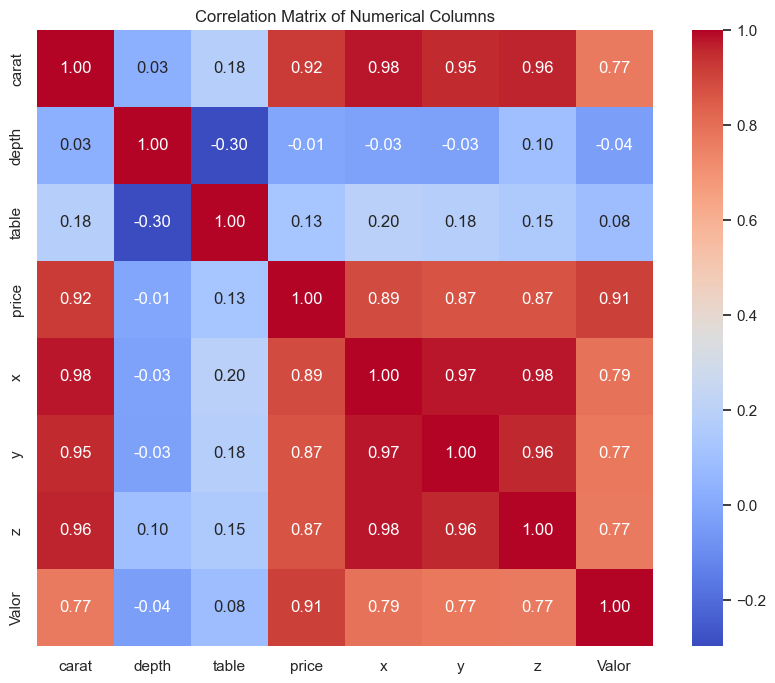

In [25]:
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

<Axes: xlabel='carat', ylabel='Density'>

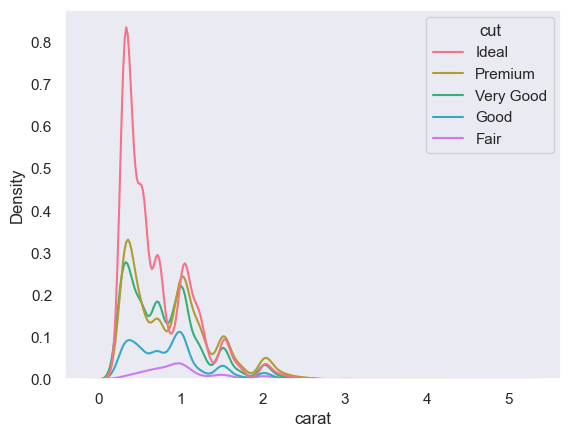

In [28]:
sns.kdeplot( data =df, x = 'carat', hue = 'cut')